In [71]:
# Importing Libraries 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('/Users/sheebamoghal/.matplotlib/stylelib/sheeba_style.mplstyle')


# Reading the countries

In [72]:
belgium = pd.read_csv('src-data/DB_ESDO_BELGIUM_2003.csv', sep=';')
belgium['COUNTRY'] = "Belgium"

In [73]:
france = pd.read_csv('src-data/DB_ESDO_FRANCE_2002-2011.csv', sep=';')
france['COUNTRY'] = "France"

In [74]:
germany = pd.read_csv('src-data/DB_ESDO_GERMANY_2005.csv', sep=';')
germany['COUNTRY'] = "Germany"
germany.rename(columns={'SEXE': 'SEX', 'AGQ': 'AGE'}, inplace=True)

In [75]:
mix = pd.concat([belgium, france, germany], join='inner', ignore_index=True)
mix.isna().sum()

SEX         0
AGE         0
QFRA_1c     0
QFRA_2c     0
QFRA_5c     0
           ..
QPOR_20c    0
QPOR_50c    0
QPOR_1e     0
QPOR_2e     0
COUNTRY     0
Length: 99, dtype: int64

In [76]:
all = pd.melt(mix, id_vars=['AGE', 'SEX', 'COUNTRY'], var_name='MINT', value_name='NUMBER')
print(all.head(10))

   AGE  SEX  COUNTRY     MINT  NUMBER
0   30    2  Belgium  QFRA_1c       0
1   17    2  Belgium  QFRA_1c       0
2   38    2  Belgium  QFRA_1c       0
3   24    2  Belgium  QFRA_1c       1
4   37    2  Belgium  QFRA_1c       0
5   25    2  Belgium  QFRA_1c       0
6   31    2  Belgium  QFRA_1c       0
7   34    2  Belgium  QFRA_1c       0
8   15    2  Belgium  QFRA_1c       0
9   57    2  Belgium  QFRA_1c       0


In [77]:
all[['MINTED', 'DENOMINATION']] = all['MINT'].str.split('_', expand=True)
all.head(5)

,AGE,SEX,COUNTRY,MINT,NUMBER,MINTED,DENOMINATION
0,30,2,Belgium,QFRA_1c,0,QFRA,1c
1,17,2,Belgium,QFRA_1c,0,QFRA,1c
2,38,2,Belgium,QFRA_1c,0,QFRA,1c
3,24,2,Belgium,QFRA_1c,1,QFRA,1c
4,37,2,Belgium,QFRA_1c,0,QFRA,1c


In [78]:
all.drop(columns='MINT', inplace=True)

In [79]:
print(all.head(10))

   AGE  SEX  COUNTRY  NUMBER MINTED DENOMINATION
0   30    2  Belgium       0   QFRA           1c
1   17    2  Belgium       0   QFRA           1c
2   38    2  Belgium       0   QFRA           1c
3   24    2  Belgium       1   QFRA           1c
4   37    2  Belgium       0   QFRA           1c
5   25    2  Belgium       0   QFRA           1c
6   31    2  Belgium       0   QFRA           1c
7   34    2  Belgium       0   QFRA           1c
8   15    2  Belgium       0   QFRA           1c
9   57    2  Belgium       0   QFRA           1c


In [80]:
all['MINTED'].unique()

array(['QFRA', 'QALL', 'QAUT', 'QBEL', 'QESP', 'QFIN', 'QGRE', 'QIRL',
       'QITA', 'QLUX', 'QPAYB', 'QPOR'], dtype=object)

In [81]:
# renaming all the columns 

one = {
   'QFRA': 'France',
   'QALL': 'Germany',
   'QAUT': 'Austria',
   'QBEL': 'Belgium',
   'QESP': 'Spain',
   'QFIN': 'Finland',
   'QGRE': 'Greece',
   'QIRL': 'Ireland',
   'QITA': 'Italy',
   'QLUX': 'Luxembourg',
   'QPAYB': 'Netherlands',
   'QPOR': 'Portugal'
}

two = {
    1: 'Man',
    2: 'Woman'
}

all['MINTED'] = all['MINTED'].replace(one)
all['SEX'] = all['SEX'].replace(two)

In [82]:
print(all.head(10))

   AGE    SEX  COUNTRY  NUMBER  MINTED DENOMINATION
0   30  Woman  Belgium       0  France           1c
1   17  Woman  Belgium       0  France           1c
2   38  Woman  Belgium       0  France           1c
3   24  Woman  Belgium       1  France           1c
4   37  Woman  Belgium       0  France           1c
5   25  Woman  Belgium       0  France           1c
6   31  Woman  Belgium       0  France           1c
7   34  Woman  Belgium       0  France           1c
8   15  Woman  Belgium       0  France           1c
9   57  Woman  Belgium       0  France           1c


## Belgium - France

In [83]:
belgium_france = pd.concat([belgium, france], join='inner', ignore_index=True)

belgium_france.head(10)

print(belgium_france.columns)

bel_fr = pd.melt(belgium_france, id_vars=['AGE', 'SEX', 'COUNTRY', 'NUTS3', 'E15', 'Weight'], var_name='MINT', value_name='NUMBER')
print(bel_fr.head(10))


Index(['NUTS3', 'SEX', 'AGE', 'E15', 'Weight', 'QFRA_1c', 'QFRA_2c', 'QFRA_5c',
       'QFRA_10c', 'QFRA_20c',
       ...
       'QPAYB_2e', 'QPOR_1c', 'QPOR_2c', 'QPOR_5c', 'QPOR_10c', 'QPOR_20c',
       'QPOR_50c', 'QPOR_1e', 'QPOR_2e', 'COUNTRY'],
      dtype='object', length=102)


   AGE  SEX  COUNTRY  NUTS3  E15  Weight     MINT  NUMBER
0   30    2  Belgium  BE324    1  0,7055  QFRA_1c       0
1   17    2  Belgium    BE1    1  1,2255  QFRA_1c       0
2   38    2  Belgium  BE332    1  2,3879  QFRA_1c       0
3   24    2  Belgium    BE1    2  0,4807  QFRA_1c       1
4   37    2  Belgium  BE343    1  1,0901  QFRA_1c       0
5   25    2  Belgium  BE324    1  1,2912  QFRA_1c       0
6   31    2  Belgium  BE332    1   1,076  QFRA_1c       0
7   34    2  Belgium    BE1    1  1,4584  QFRA_1c       0
8   15    2  Belgium  BE343    2   0,912  QFRA_1c       0
9   57    2  Belgium  BE333    2  1,1846  QFRA_1c       0


In [84]:
bel_fr[['MINTED', 'DENOMINATION']] = bel_fr['MINT'].str.split('_', expand=True)
bel_fr.head(5)


,AGE,SEX,COUNTRY,NUTS3,E15,Weight,MINT,NUMBER,MINTED,DENOMINATION
0,30,2,Belgium,BE324,1,"0,7055",QFRA_1c,0,QFRA,1c
1,17,2,Belgium,BE1,1,"1,2255",QFRA_1c,0,QFRA,1c
2,38,2,Belgium,BE332,1,"2,3879",QFRA_1c,0,QFRA,1c
3,24,2,Belgium,BE1,2,"0,4807",QFRA_1c,1,QFRA,1c
4,37,2,Belgium,BE343,1,"1,0901",QFRA_1c,0,QFRA,1c


In [85]:
bel_fr.drop(columns='MINT', inplace=True)

In [86]:
bel_fr['MINTED'] = bel_fr['MINTED'].replace(one)
bel_fr['SEX'] = bel_fr['SEX'].replace(two)
bel_fr.head(10)

,AGE,SEX,COUNTRY,NUTS3,E15,Weight,NUMBER,MINTED,DENOMINATION
0,30,Woman,Belgium,BE324,1,"0,7055",0,France,1c
1,17,Woman,Belgium,BE1,1,"1,2255",0,France,1c
2,38,Woman,Belgium,BE332,1,"2,3879",0,France,1c
3,24,Woman,Belgium,BE1,2,"0,4807",1,France,1c
4,37,Woman,Belgium,BE343,1,"1,0901",0,France,1c
5,25,Woman,Belgium,BE324,1,"1,2912",0,France,1c
6,31,Woman,Belgium,BE332,1,"1,076",0,France,1c
7,34,Woman,Belgium,BE1,1,"1,4584",0,France,1c
8,15,Woman,Belgium,BE343,2,"0,912",0,France,1c
9,57,Woman,Belgium,BE333,2,"1,1846",0,France,1c


## Belgium- Germany 

In [87]:
belgium_germany=pd.concat([belgium,germany], join='inner', ignore_index=True)
belgium_germany.head(10)
print(belgium_germany.columns)
bel_ger = pd.melt(belgium_germany, id_vars=['AGE', 'SEX', 'COUNTRY',], var_name='MINT', value_name='NUMBER')
print(bel_ger.head(10))


Index(['SEX', 'AGE', 'QFRA_1c', 'QFRA_2c', 'QFRA_5c', 'QFRA_10c', 'QFRA_20c',
       'QFRA_50c', 'QFRA_1e', 'QFRA_2e', 'QALL_1c', 'QALL_2c', 'QALL_5c',
       'QALL_10c', 'QALL_20c', 'QALL_50c', 'QALL_1e', 'QALL_2e', 'QAUT_1c',
       'QAUT_2c', 'QAUT_5c', 'QAUT_10c', 'QAUT_20c', 'QAUT_50c', 'QAUT_1e',
       'QAUT_2e', 'QBEL_1c', 'QBEL_2c', 'QBEL_5c', 'QBEL_10c', 'QBEL_20c',
       'QBEL_50c', 'QBEL_1e', 'QBEL_2e', 'QESP_1c', 'QESP_2c', 'QESP_5c',
       'QESP_10c', 'QESP_20c', 'QESP_50c', 'QESP_1e', 'QESP_2e', 'QFIN_1c',
       'QFIN_2c', 'QFIN_5c', 'QFIN_10c', 'QFIN_20c', 'QFIN_50c', 'QFIN_1e',
       'QFIN_2e', 'QGRE_1c', 'QGRE_2c', 'QGRE_5c', 'QGRE_10c', 'QGRE_20c',
       'QGRE_50c', 'QGRE_1e', 'QGRE_2e', 'QIRL_1c', 'QIRL_2c', 'QIRL_5c',
       'QIRL_10c', 'QIRL_20c', 'QIRL_50c', 'QIRL_1e', 'QIRL_2e', 'QITA_1c',
       'QITA_2c', 'QITA_5c', 'QITA_10c', 'QITA_20c', 'QITA_50c', 'QITA_1e',
       'QITA_2e', 'QLUX_1c', 'QLUX_2c', 'QLUX_5c', 'QLUX_10c', 'QLUX_20c',
       'QLUX_50c', 

In [88]:
bel_ger[['MINTED', 'DENOMINATION']] = bel_ger['MINT'].str.split('_', expand=True)
bel_ger.head(5)

,AGE,SEX,COUNTRY,MINT,NUMBER,MINTED,DENOMINATION
0,30,2,Belgium,QFRA_1c,0,QFRA,1c
1,17,2,Belgium,QFRA_1c,0,QFRA,1c
2,38,2,Belgium,QFRA_1c,0,QFRA,1c
3,24,2,Belgium,QFRA_1c,1,QFRA,1c
4,37,2,Belgium,QFRA_1c,0,QFRA,1c


In [89]:
bel_ger.drop(columns='MINT', inplace=True)

In [90]:
bel_ger['MINTED'] = bel_ger['MINTED'].replace(one)
bel_ger['SEX'] = bel_ger['SEX'].replace(two)
bel_ger.head(10)

,AGE,SEX,COUNTRY,NUMBER,MINTED,DENOMINATION
0,30,Woman,Belgium,0,France,1c
1,17,Woman,Belgium,0,France,1c
2,38,Woman,Belgium,0,France,1c
3,24,Woman,Belgium,1,France,1c
4,37,Woman,Belgium,0,France,1c
5,25,Woman,Belgium,0,France,1c
6,31,Woman,Belgium,0,France,1c
7,34,Woman,Belgium,0,France,1c
8,15,Woman,Belgium,0,France,1c
9,57,Woman,Belgium,0,France,1c


# France - Germany 

In [91]:
france_germany=pd.concat([france,germany], join='inner', ignore_index=True)

france_germany.head(10)

print(france_germany.columns)

fra_ger = pd.melt(france_germany, id_vars=['AGE', 'SEX', 'COUNTRY','NPF5'], var_name='MINT', value_name='NUMBER')
print(fra_ger.head(10))

Index(['SEX', 'AGE', 'NPF5', 'QFRA_1c', 'QFRA_2c', 'QFRA_5c', 'QFRA_10c',
       'QFRA_20c', 'QFRA_50c', 'QFRA_1e', 'QFRA_2e', 'QALL_1c', 'QALL_2c',
       'QALL_5c', 'QALL_10c', 'QALL_20c', 'QALL_50c', 'QALL_1e', 'QALL_2e',
       'QBEL_1c', 'QBEL_2c', 'QBEL_5c', 'QBEL_10c', 'QBEL_20c', 'QBEL_50c',
       'QBEL_1e', 'QBEL_2e', 'QESP_1c', 'QESP_2c', 'QESP_5c', 'QESP_10c',
       'QESP_20c', 'QESP_50c', 'QESP_1e', 'QESP_2e', 'QITA_1c', 'QITA_2c',
       'QITA_5c', 'QITA_10c', 'QITA_20c', 'QITA_50c', 'QITA_1e', 'QITA_2e',
       'QLUX_1c', 'QLUX_2c', 'QLUX_5c', 'QLUX_10c', 'QLUX_20c', 'QLUX_50c',
       'QLUX_1e', 'QLUX_2e', 'QPAYB_1c', 'QPAYB_2c', 'QPAYB_5c', 'QPAYB_10c',
       'QPAYB_20c', 'QPAYB_50c', 'QPAYB_1e', 'QPAYB_2e', 'QPOR_1c', 'QPOR_2c',
       'QPOR_5c', 'QPOR_10c', 'QPOR_20c', 'QPOR_50c', 'QPOR_1e', 'QPOR_2e',
       'QAUT_1c', 'QAUT_2c', 'QAUT_5c', 'QAUT_10c', 'QAUT_20c', 'QAUT_50c',
       'QAUT_1e', 'QAUT_2e', 'QFIN_1c', 'QFIN_2c', 'QFIN_5c', 'QFIN_10c',
       'QFIN_20

In [92]:
fra_ger[['MINTED', 'DENOMINATION']] = fra_ger['MINT'].str.split('_', expand=True)
fra_ger.head(5)

,AGE,SEX,COUNTRY,NPF5,MINT,NUMBER,MINTED,DENOMINATION
0,47,2,France,4,QFRA_1c,0,QFRA,1c
1,34,2,France,3,QFRA_1c,1,QFRA,1c
2,25,1,France,3,QFRA_1c,2,QFRA,1c
3,55,1,France,2,QFRA_1c,1,QFRA,1c
4,61,1,France,2,QFRA_1c,3,QFRA,1c


In [93]:
fra_ger.drop(columns='MINT', inplace=True)

In [94]:
fra_ger['MINTED'] = fra_ger['MINTED'].replace(one)
fra_ger['SEX'] = fra_ger['SEX'].replace(two)
fra_ger.head(10)

,AGE,SEX,COUNTRY,NPF5,NUMBER,MINTED,DENOMINATION
0,47,Woman,France,4,0,France,1c
1,34,Woman,France,3,1,France,1c
2,25,Man,France,3,2,France,1c
3,55,Man,France,2,1,France,1c
4,61,Man,France,2,3,France,1c
5,37,Man,France,4,4,France,1c
6,27,Woman,France,1,0,France,1c
7,32,Man,France,3,1,France,1c
8,22,Man,France,1,7,France,1c
9,29,Woman,France,4,2,France,1c


## Overview of all 

In [95]:
print(all.head(5))

   AGE    SEX  COUNTRY  NUMBER  MINTED DENOMINATION
0   30  Woman  Belgium       0  France           1c
1   17  Woman  Belgium       0  France           1c
2   38  Woman  Belgium       0  France           1c
3   24  Woman  Belgium       1  France           1c
4   37  Woman  Belgium       0  France           1c


In [96]:
print(bel_fr.head(10))

   AGE    SEX  COUNTRY  NUTS3  E15  Weight  NUMBER  MINTED DENOMINATION
0   30  Woman  Belgium  BE324    1  0,7055       0  France           1c
1   17  Woman  Belgium    BE1    1  1,2255       0  France           1c
2   38  Woman  Belgium  BE332    1  2,3879       0  France           1c
3   24  Woman  Belgium    BE1    2  0,4807       1  France           1c
4   37  Woman  Belgium  BE343    1  1,0901       0  France           1c
5   25  Woman  Belgium  BE324    1  1,2912       0  France           1c
6   31  Woman  Belgium  BE332    1   1,076       0  France           1c
7   34  Woman  Belgium    BE1    1  1,4584       0  France           1c
8   15  Woman  Belgium  BE343    2   0,912       0  France           1c
9   57  Woman  Belgium  BE333    2  1,1846       0  France           1c


In [97]:
print(bel_ger.head(10))

   AGE    SEX  COUNTRY  NUMBER  MINTED DENOMINATION
0   30  Woman  Belgium       0  France           1c
1   17  Woman  Belgium       0  France           1c
2   38  Woman  Belgium       0  France           1c
3   24  Woman  Belgium       1  France           1c
4   37  Woman  Belgium       0  France           1c
5   25  Woman  Belgium       0  France           1c
6   31  Woman  Belgium       0  France           1c
7   34  Woman  Belgium       0  France           1c
8   15  Woman  Belgium       0  France           1c
9   57  Woman  Belgium       0  France           1c


In [98]:
print(fra_ger.head(10))

   AGE    SEX COUNTRY  NPF5  NUMBER  MINTED DENOMINATION
0   47  Woman  France     4       0  France           1c
1   34  Woman  France     3       1  France           1c
2   25    Man  France     3       2  France           1c
3   55    Man  France     2       1  France           1c
4   61    Man  France     2       3  France           1c
5   37    Man  France     4       4  France           1c
6   27  Woman  France     1       0  France           1c
7   32    Man  France     3       1  France           1c
8   22    Man  France     1       7  France           1c
9   29  Woman  France     4       2  France           1c


## Data Visualisation

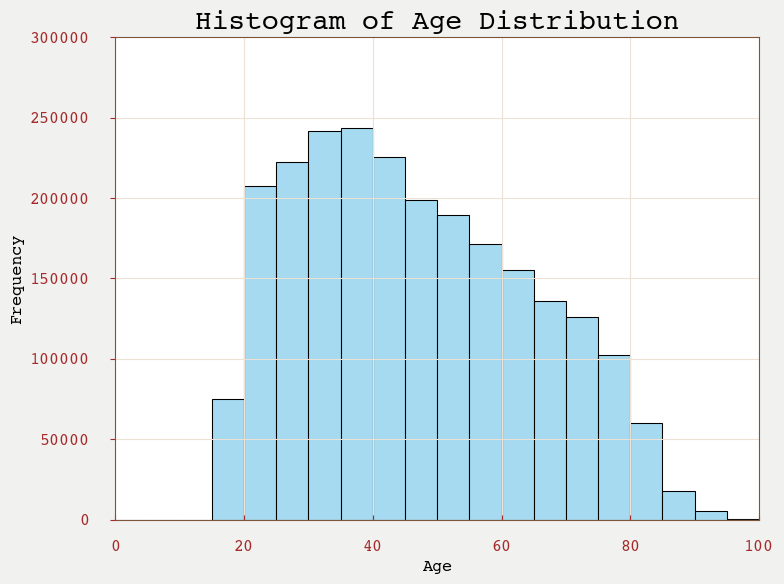

In [113]:

plt.figure(figsize=(8, 6))
sns.histplot(all['AGE'], bins=range(0, all['AGE'].max() + 5, 5), color='skyblue', edgecolor='black')
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.ylim(0, 300000)
plt.grid(True)
plt.show()


/var/folders/cm/1bq_zvw92w99j_5d1p5jq5v40000gn/T/ipykernel_92290/3236797875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=all, x='SEX', palette={'Woman': 'pink', 'Man': 'blue'})


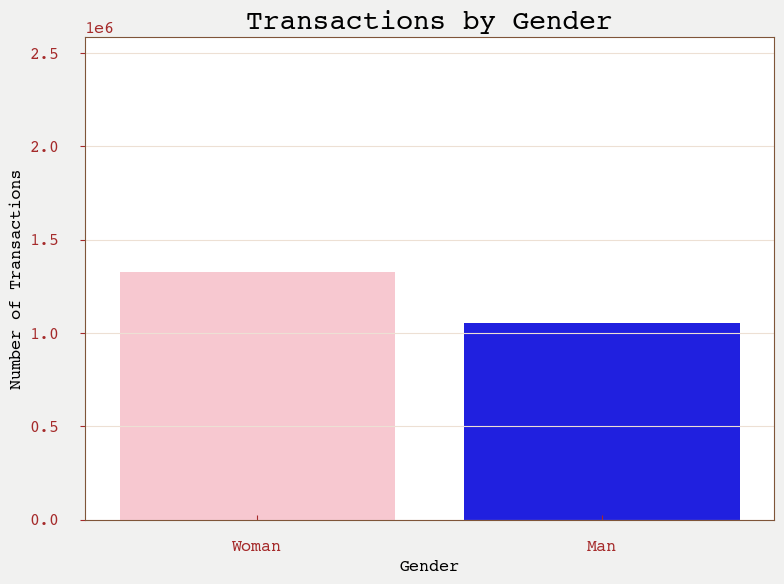

In [100]:
plt.figure(figsize=(8, 6))
sns.countplot(data=all, x='SEX', palette={'Woman': 'pink', 'Man': 'blue'})
plt.title('Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()

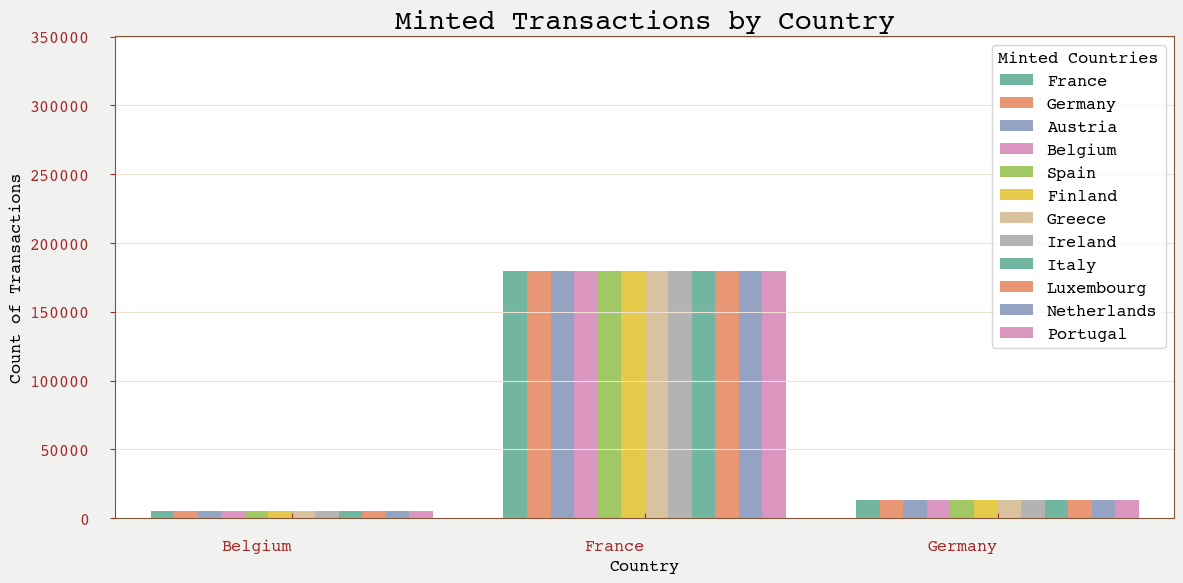

In [125]:
# CHOSEN
plt.figure(figsize=(12, 6))
sns.countplot(data=all, x='COUNTRY', hue='MINTED', palette='Set2')
plt.title('Minted Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.legend(title='Minted Countries')
plt.show()

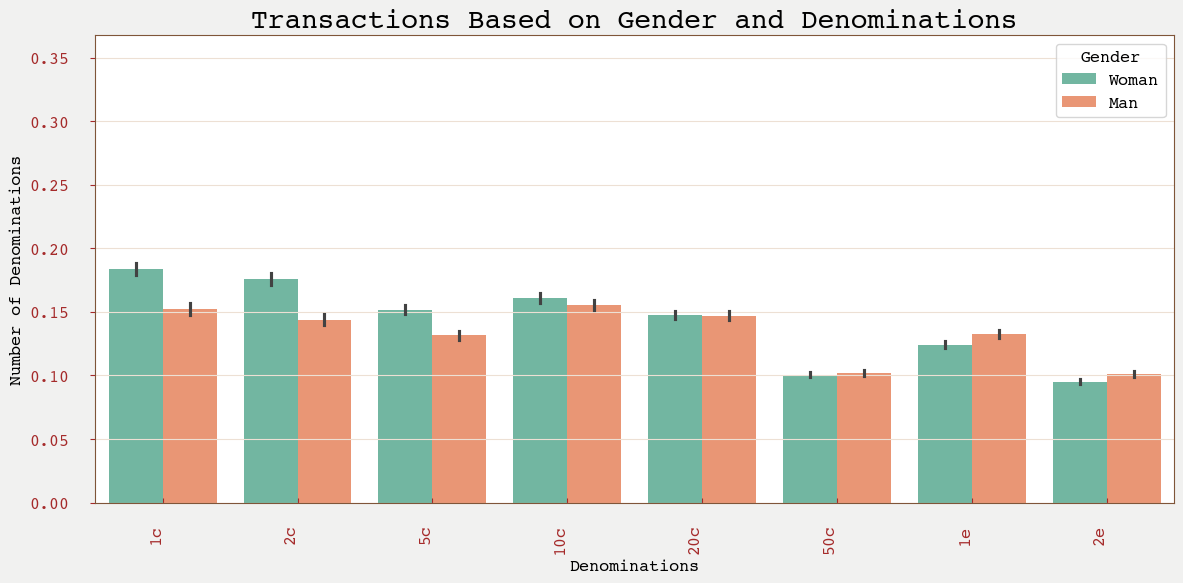

In [124]:
# CHOSEN
plt.figure(figsize=(12, 6))
sns.barplot(data=all, x='DENOMINATION', y= 'NUMBER', hue='SEX', palette='Set2')
plt.title('Transactions Based on Gender and Denominations')
plt.xlabel('Denominations')
plt.ylabel('Number of Denominations')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

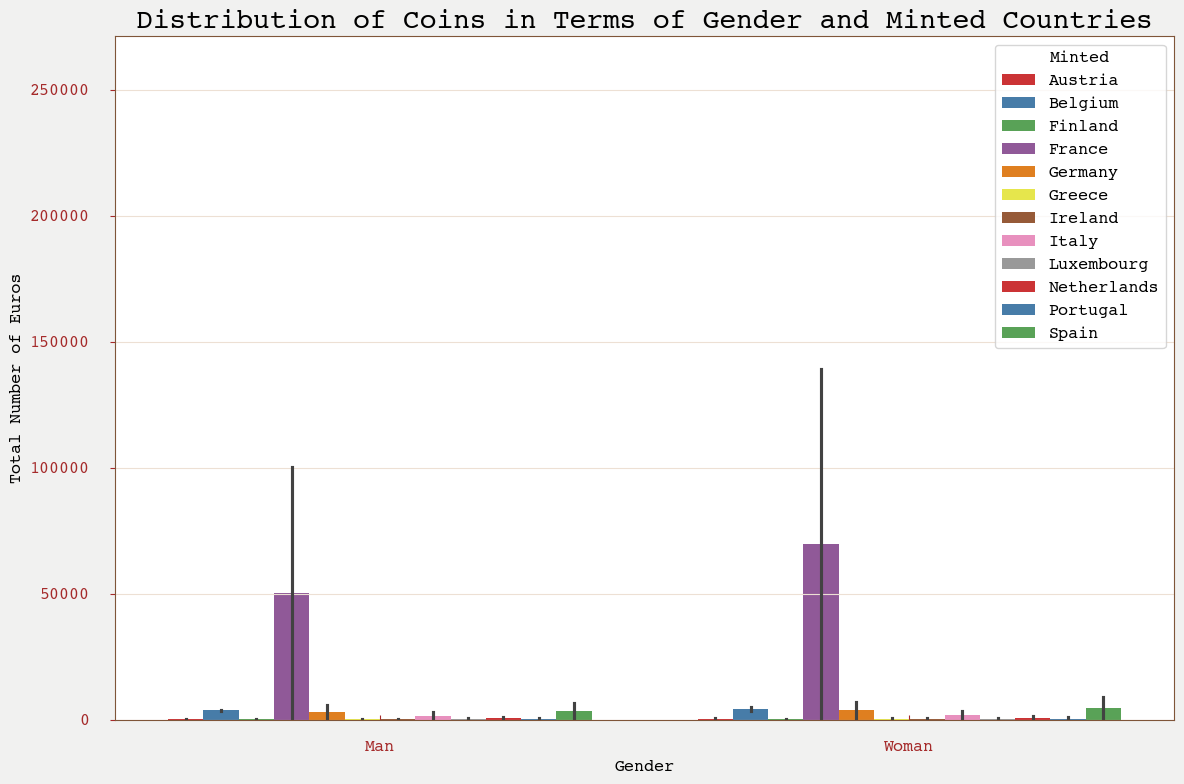

In [127]:

# Group by 'SEX', 'MINTED', 'COUNTRY', and aggregate 'NUMBER'
grouped_data = bel_fr.groupby(['SEX', 'MINTED', 'COUNTRY']).agg({'NUMBER': 'sum'}).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='SEX', y='NUMBER', hue='MINTED', palette='Set1')
plt.title('Distribution of Coins in Terms of Gender and Minted Countries')
plt.xlabel('Gender')
plt.ylabel('Total Number of Euros')
plt.legend(title='Minted')
plt.show()

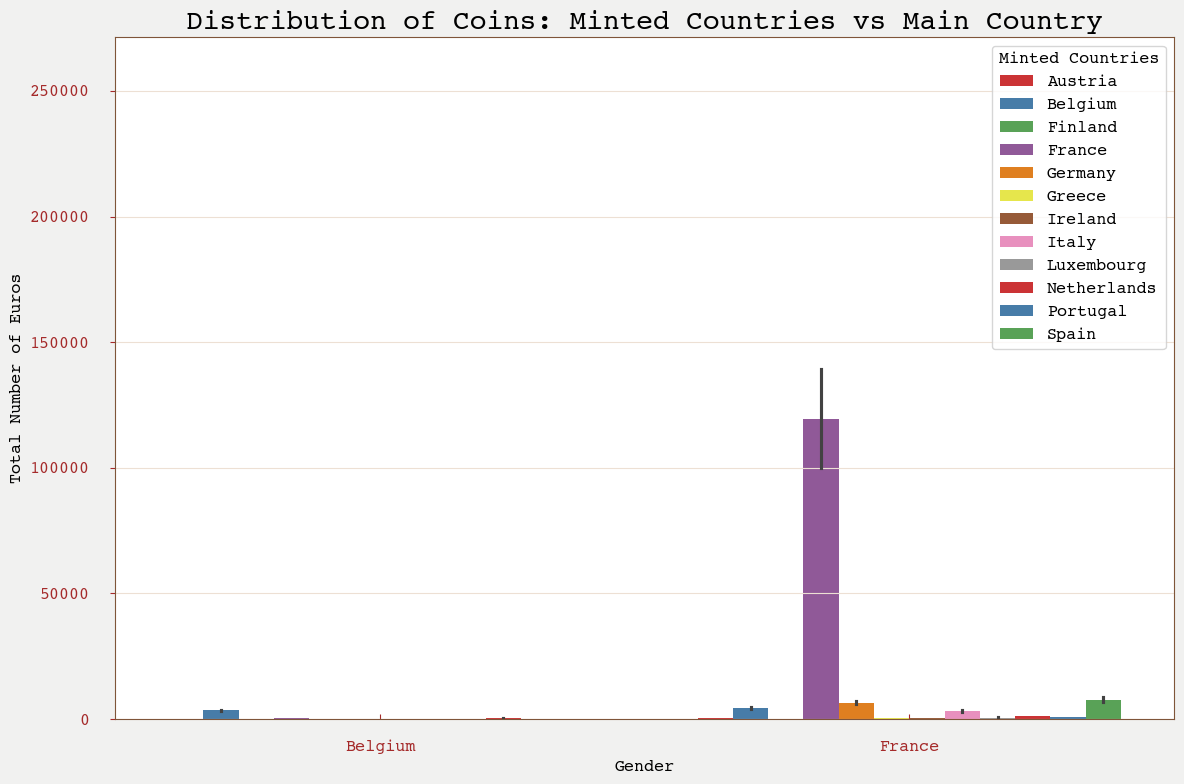

In [130]:
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='COUNTRY', y='NUMBER', hue='MINTED', palette='Set1')
plt.title('Distribution of Coins: Minted Countries vs Main Country')
plt.xlabel('Gender')
plt.ylabel('Total Number of Euros')
plt.legend(title='Minted Countries')
plt.show()

In [104]:
france.columns

Index(['SURVEY', 'SEX', 'AGE', 'AGGL_FR_5', 'NUTS3', 'NPF5', 'E15', 'PRO6_FR',
       'PRO6_FR_CF', 'SIT_SAL',
       ...
       'QSLVA_2e', 'QSLVE_1c', 'QSLVE_2c', 'QSLVE_5c', 'QSLVE_10c',
       'QSLVE_20c', 'QSLVE_50c', 'QSLVE_1e', 'QSLVE_2e', 'COUNTRY'],
      dtype='object', length=159)

In [105]:
#Belgium.drop(columns=['NUTS3', 'Weight', 'SURVEY'], inplace=True)
belgium.columns


Index(['ZEAT', 'NUTS3', 'HAB4', 'SEX', 'AGE', 'LIEN', 'NPFQ', 'RS4', 'RS14',
       'RS20',
       ...
       'QPAYB_2e', 'QPOR_1c', 'QPOR_2c', 'QPOR_5c', 'QPOR_10c', 'QPOR_20c',
       'QPOR_50c', 'QPOR_1e', 'QPOR_2e', 'COUNTRY'],
      dtype='object', length=115)

In [106]:
belgium1= pd.melt(belgium, id_vars=['ZEAT', 'NUTS3', 'HAB4', 'SEX', 'AGE', 'LIEN', 'NPFQ', 'RS4', 'RS14', 'RS20', 'RS21', 'RS22', 'RS22B', 'RS30', 'PCSI1', 'PCSC2', 'E15', 'Weight'], var_name='MINT', value_name='NUMBER')
#print(belgium1.head(10))

belgium1[['MINTED', 'DENOMINATION']] = belgium1['MINT'].str.split('_', expand=True)

belgium1.head(5)
belgium1.drop(columns='MINT', inplace=True)

hi = {
   'QFRA': 'France',
   'QALL': 'Germany',
   'QAUT': 'Austria',
   'QBEL': 'Belgium',
   'QESP': 'Spain',
   'QFIN': 'Finland',
   'QGRE': 'Greece',
   'QIRL': 'Ireland',
   'QITA': 'Italy',
   'QLUX': 'Luxembourg',
   'QPAYB': 'Netherlands',
   'QPOR': 'Portugal'
}

belgium1['MINTED'] = belgium1['MINTED'].replace(hi)
belgium1['Weight'] = belgium1['Weight'].str.replace(',', '.').astype(float)

print(belgium1.head(4))



                     ZEAT  NUTS3  HAB4  SEX  AGE  LIEN  NPFQ  RS4  RS14  RS20  \
0  Nielsen IV (Sud Ouest)  BE324     2    2   30     2     3  1.0   1.0     1   
1    Nielsen III (Centre)    BE1     1    2   17     2     9  NaN   2.0     2   
2     Nielsen V (Sud Est)  BE332     1    2   38     2     4  2.0   2.0     2   
3    Nielsen III (Centre)    BE1     1    2   24     1     1  2.0   2.0     2   

   ...  RS22  RS22B  RS30  PCSI1  PCSC2  E15  Weight  NUMBER  MINTED  \
0  ...     3      3     1      3      3    1  0.7055       0  France   
1  ...     2      7     2     17     11    1  1.2255       0  France   
2  ...     6      6     1     12     11    1  2.3879       0  France   
3  ...     6      6     1     11     11    2  0.4807       1  France   

  DENOMINATION  
0           1c  
1           1c  
2           1c  
3           1c  

[4 rows x 21 columns]


In [107]:
one = {
    1: 'big city',
    2: 'urban areas',
    3: 'intermediary areas',
    4: 'rural areas'
}

belgium1['HAB4'] = belgium1['HAB4'].replace(one)

#######

two = {
    1: 'Man',
    2: 'Woman'
}


belgium1['SEX'] = belgium1['SEX'].replace(two)

#######

three = {
    1: 'Yes',
    2: 'No'
}


belgium1['LIEN'] = belgium1['LIEN'].replace(three)

#######

four = {
    1: 'Own Account',
    2: 'Employment'
}

belgium1['RS4'] = belgium1['RS4'].replace(four)

#######

five = {
    1: 'Own Account',
    2: 'Employment'
}

belgium1['RS14'] = belgium1['RS14'].replace(five)

#######

six = {
    1: 'Yes',
    2: 'No'
}

belgium1['RS20'] = belgium1['RS20'].replace(six)

#######

seven = {
    1: 'Married/In Marriage',
    2: 'Single',
    3: 'Widowed/Divorced/Separated'
}

belgium1['RS21'] = belgium1['RS21'].replace(seven)

#######

eight = {
    1: 'Primary',
    2: 'Lower Secondary',
    3: 'Higher Secondary Degree',
    4: 'Lower Professional Degree',
    5: 'Higher Professional Degree',
    6: 'Non-University Education',
    7: 'University Degree'
}

belgium1['RS22'] = belgium1['RS22'].replace(eight)

#######

nine = {
    1: 'Primary',
    2: 'Lower Secondary',
    3: 'Higher Secondary Degree',
    4: 'Lower Professional Degree',
    5: 'Higher Professional Degree',
    6: 'Non-University Education',
    7: 'University Degree'
}

belgium1['RS22B'] = belgium1['RS22B'].replace(nine)

#######

ten = {
    1: 'Yes',
    2: 'No'
}

belgium1['RS30'] = belgium1['RS30'].replace(ten)

#######

eleven = {
    1: 'small farmer',
    2: 'large farmer',
    3: 'craftsman/trader',
    4: 'industrialist/large trader',
    5: 'liberal/qualified position',
    6: 'MOGM/Senior Executive < 5 EM',
    7: 'MOGM/Senior Executive < 10 EM',
    8: 'MOGM/Senior Executive > 10 EM',
    9: 'Middle Management < 5 EM',
    10: 'Middle Management > 6 EM',
    11: 'Other-Clerical',
    12: 'Other-Nurse/Police/Teacher',
    13: 'Skilled Worker/Foreman',
    14: 'Unskilled Worker/Labourer',
    15: 'Disabled',
    16: 'Pensioner/Retired',
    17: 'Student',
    18: 'Housewife',
    19: 'Unemployed',
    20: 'Annuitant'
}


belgium1['PCSI1'] = belgium1['PCSI1'].replace(eleven)

#######

twelve = {
    1: 'small farmer',
    2: 'large farmer',
    3: 'craftsman/trader',
    4: 'industrialist/large trader',
    5: 'liberal/qualified position',
    6: 'MOGM/Senior Executive < 5 EM',
    7: 'MOGM/Senior Executive < 10 EM',
    8: 'MOGM/Senior Executive > 10 EM',
    9: 'Middle Management < 5 EM',
    10: 'Middle Management > 6 EM',
    11: 'Other-Clerical',
    12: 'Other-Nurse/Police/Teacher',
    13: 'Skilled Worker/Foreman',
    14: 'Unskilled Worker/Labourer',
    15: 'Disabled',
    16: 'Pensioner/Retired',
    17: 'Student',
    18: 'Housewife',
    19: 'Unemployed',
    20: 'Annuitant'
}


belgium1['PCSC2'] = belgium1['PCSC2'].replace(twelve)

#######

thirteen = {
    1: 'Yes',
    2: 'No'
}

belgium1['E15'] = belgium1['E15'].replace(thirteen)


In [108]:
belgium1.head(5)

,ZEAT,NUTS3,HAB4,SEX,AGE,LIEN,NPFQ,RS4,RS14,RS20,...,RS22,RS22B,RS30,PCSI1,PCSC2,E15,Weight,NUMBER,MINTED,DENOMINATION
0,Nielsen IV (Sud Ouest),BE324,urban areas,Woman,30,No,3,Own Account,Own Account,Yes,...,Higher Secondary Degree,Higher Secondary Degree,Yes,craftsman/trader,craftsman/trader,Yes,0.7055,0,France,1c
1,Nielsen III (Centre),BE1,big city,Woman,17,No,9,NaN,Employment,No,...,Lower Secondary,University Degree,No,Student,Other-Clerical,Yes,1.2255,0,France,1c
2,Nielsen V (Sud Est),BE332,big city,Woman,38,No,4,Employment,Employment,No,...,Non-University Education,Non-University Education,Yes,Other-Nurse/Police/Teacher,Other-Clerical,Yes,2.3879,0,France,1c
3,Nielsen III (Centre),BE1,big city,Woman,24,Yes,1,Employment,Employment,No,...,Non-University Education,Non-University Education,Yes,Other-Clerical,Other-Clerical,No,0.4807,1,France,1c
4,Nielsen V (Sud Est),BE343,rural areas,Woman,37,Yes,4,Employment,Employment,No,...,Non-University Education,Non-University Education,Yes,Other-Nurse/Police/Teacher,Other-Nurse/Police/Teacher,Yes,1.0901,0,France,1c


In [109]:
belgium1.columns

Index(['ZEAT', 'NUTS3', 'HAB4', 'SEX', 'AGE', 'LIEN', 'NPFQ', 'RS4', 'RS14',
       'RS20', 'RS21', 'RS22', 'RS22B', 'RS30', 'PCSI1', 'PCSC2', 'E15',
       'Weight', 'NUMBER', 'MINTED', 'DENOMINATION'],
      dtype='object')

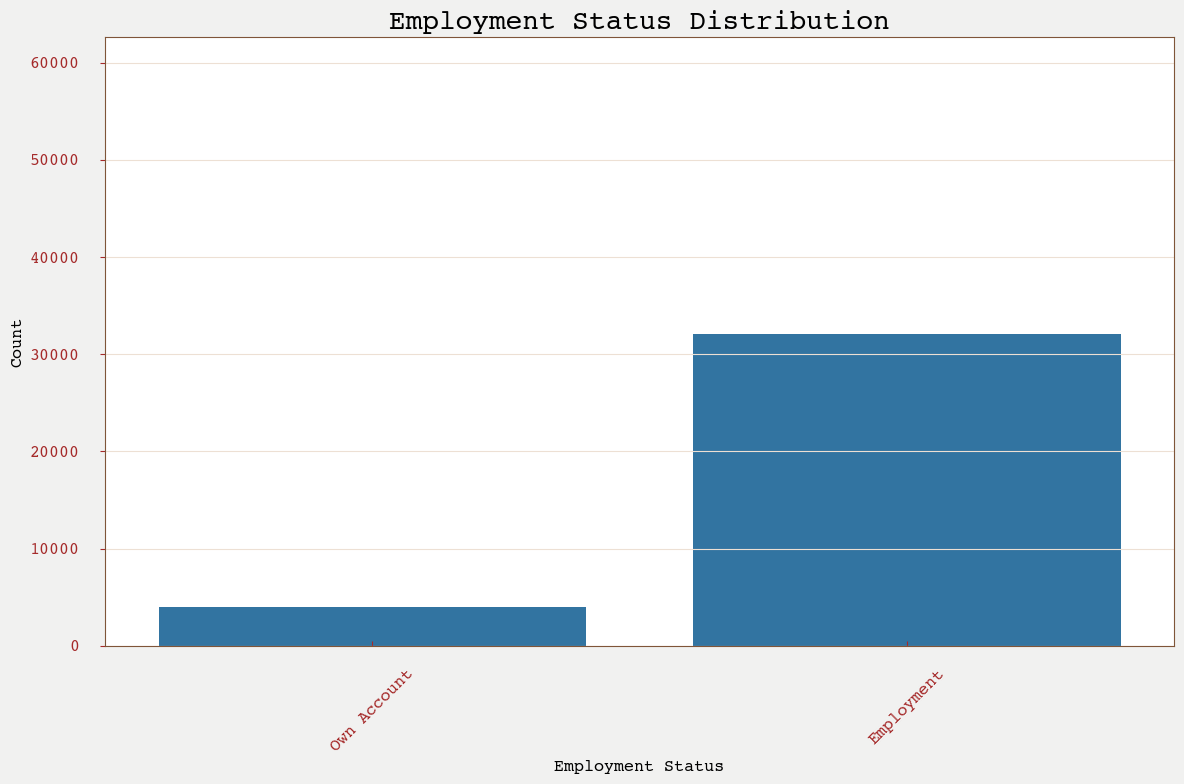

In [110]:
plt.figure(figsize=(12, 8))
sns.countplot(data=belgium1, x='RS4')
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


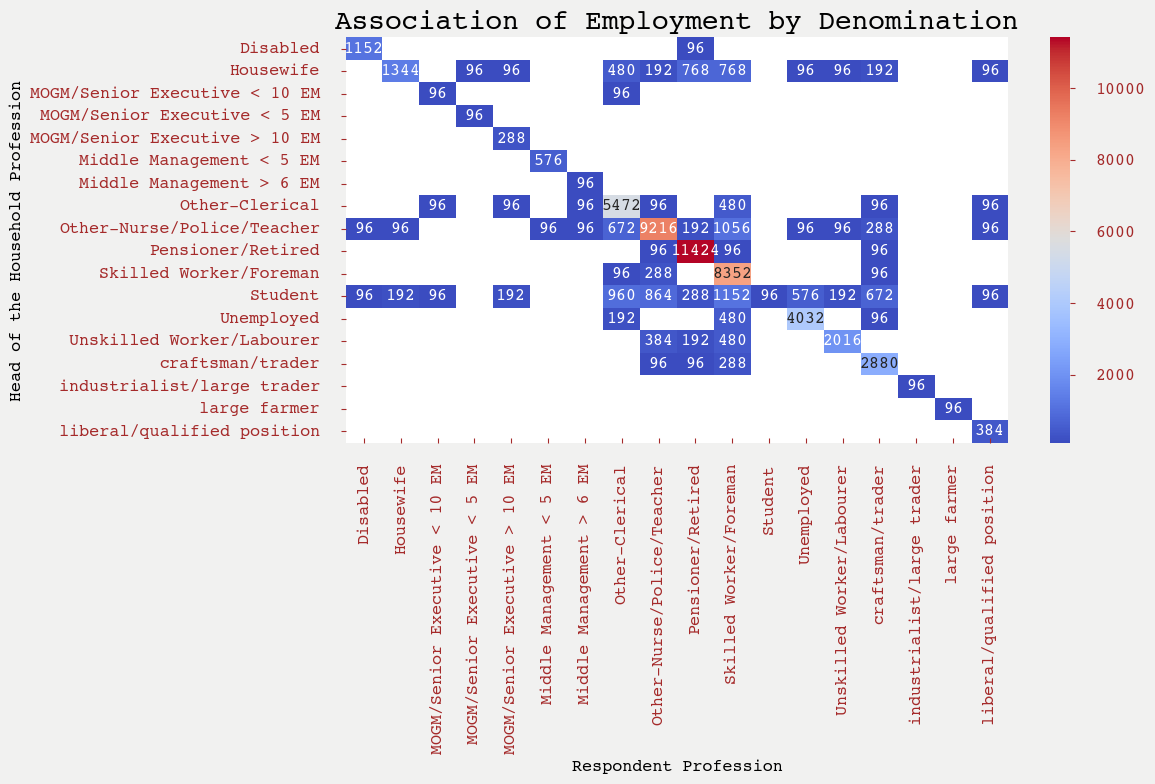

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = belgium1.pivot_table(index='PCSI1', columns='PCSC2', values='DENOMINATION', aggfunc='count')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True,fmt='g')
plt.title('Association of Employment by Denomination')
plt.xlabel('Respondent Profession')
plt.ylabel('Head of the Household Profession')
plt.grid(False)
plt.show()
